In [1]:
from multi_k_model import MultiKModel

In [2]:
filepath = 'dna2vec/pretrained/dna2vec-20161219-0153-k3to8-100d-10c-29320Mbp-sliding-Xat.w2v'
mk_model = MultiKModel(filepath)

In [3]:
# 实际上采用100维向量进行表示
mk_model.vector('AAA')

array([ 0.023137,  0.156295, -0.247631, -0.334389, -0.192204,  0.041053,
       -0.206709, -0.058753, -0.00343 , -0.371543,  0.22161 ,  0.192632,
        0.139376,  0.227176,  0.155875,  0.077491, -0.256322, -0.332782,
       -0.113679,  0.22403 , -0.044831, -0.184227, -0.288251, -0.041761,
       -0.114018, -0.15135 , -0.182786, -0.117931,  0.286294, -0.112629,
       -0.012661, -0.094454,  0.103956, -0.235743, -0.266493, -0.04168 ,
       -0.014619, -0.481348, -0.206115,  0.139335,  0.091203, -0.377512,
       -0.078036, -0.373412, -0.132369, -0.190614, -0.308002, -0.365701,
       -0.327944, -0.166004, -0.162306, -0.087187, -0.253729, -0.066742,
       -0.100518,  0.161993,  0.153988, -0.349804, -0.30423 ,  0.013614,
        0.302106,  0.222722,  0.064441,  0.060697,  0.026015, -0.093327,
       -0.180128, -0.142379, -0.102415,  0.12586 , -0.507178, -0.19879 ,
        0.098929,  0.116615, -0.018012, -0.130283,  0.016617,  0.105993,
       -0.345523, -0.096997, -0.208423,  0.008292, 

In [4]:
mk_model.vector('AACTG')

array([-0.15144 ,  0.402682,  0.174942, -0.151474, -0.12298 , -0.032686,
       -0.350906,  0.551507, -0.189532,  0.09017 , -0.209234,  0.155443,
       -0.267364,  0.130702, -0.114127,  0.120379, -0.021199,  0.276282,
       -0.303858, -0.072749, -0.067603, -0.394508,  0.155379, -0.084473,
        0.035493,  0.046085,  0.241118,  0.014529,  0.24582 ,  0.394098,
        0.149688,  0.030398, -0.008685, -0.473792, -0.190625,  0.243985,
        0.270713, -0.11186 ,  0.223763, -0.191218,  0.074076, -0.718573,
       -0.00355 , -0.100341, -0.162996,  0.232268,  0.162325, -0.354766,
       -0.283402, -0.500514, -0.516311,  0.068627,  0.94819 , -0.10174 ,
       -0.050425, -0.132169,  0.487517, -0.228681,  0.283137,  0.214325,
        0.378319, -0.238374,  0.039423, -0.126938,  0.176624, -0.247969,
        0.130101,  0.182488,  0.047255, -0.119157, -1.137723,  0.003113,
        0.069653, -0.424884, -0.298161, -0.44593 , -0.220162, -0.154765,
       -0.14851 , -0.122649, -0.022128,  0.009395, 

In [5]:
mk_model.cosine_distance('AAA', 'GCT')

0.14546436

In [6]:
mk_model.cosine_distance('AAA', 'AAAA')

0.8900015

In [7]:
[len(mk_model.model(k).key_to_index) for k in range(3,9)]

[64, 256, 1024, 4096, 16384, 65536]

In [8]:
[4**k for k in range(3,9)]

[64, 256, 1024, 4096, 16384, 65536]

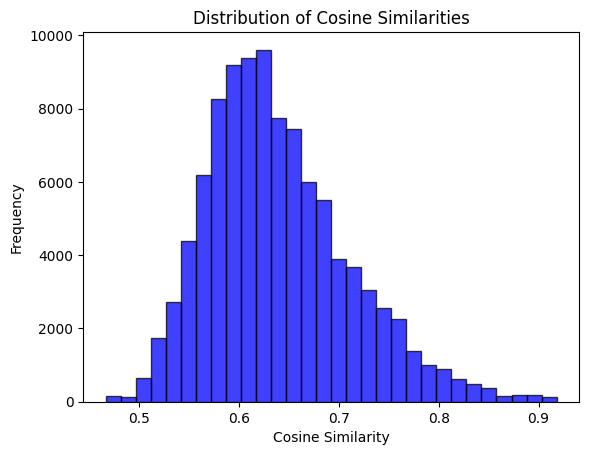

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import KeyedVectors
import random

# Load the pretrained dna2vec model
filepath = 'dna2vec/pretrained/dna2vec-20161219-0153-k3to8-100d-10c-29320Mbp-sliding-Xat.w2v'
wv = KeyedVectors.load_word2vec_format(filepath, binary=False)

# Function to compute the vector for a given sequence using mk_model
def compute_vector(sequence):
    if 3 <= len(sequence) <= 8:
        return np.array(wv[sequence])
    else:
        raise ValueError("Sequence length must be between 3 and 8")

# Function to compute cosine similarity between two vectors
def compute_cosine_similarity(vector1, vector2):
    vector1 = vector1.reshape(1, -1)
    vector2 = vector2.reshape(1, -1)
    return cosine_similarity(vector1, vector2)[0][0]

# Function to evaluate the similarity between combined subsequences and a target sequence
def evaluate_sequence_similarity(subseqs, target_seq):
    try:
        subseq_vectors = [compute_vector(subseq) for subseq in subseqs]
        combined_vector = np.sum(subseq_vectors, axis=0)
        target_vector = compute_vector(target_seq)
        similarity = compute_cosine_similarity(combined_vector, target_vector)
        return similarity
    except ValueError as e:
        # Handle any sequences that are out of the valid length range
        print(e)
        return None

# Function to generate random sequences
def generate_random_sequence(length):
    return ''.join(random.choices(['A', 'C', 'G', 'T'], k=length))

# Generate random test cases ensuring sequence length is between 3 and 8
subseq_list = [(generate_random_sequence(3), generate_random_sequence(3)) for _ in range(100000)]
target_seq_list = [s1 + s2 for s1, s2 in subseq_list if 3 <= len(s1 + s2) <= 8]

# Calculate cosine similarities
similarities = [evaluate_sequence_similarity([s1, s2], target) for (s1, s2), target in zip(subseq_list, target_seq_list) if evaluate_sequence_similarity([s1, s2], target) is not None]

# Plot the distribution of cosine similarities
plt.hist(similarities, bins=30, alpha=0.75, color='blue', edgecolor='black')
plt.title('Distribution of Cosine Similarities')
plt.xlabel('Cosine Similarity')
plt.ylabel('Frequency')
plt.show()

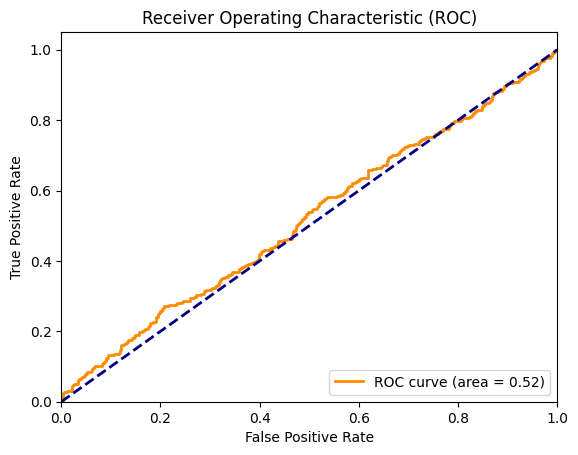

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 假设你已经计算了余弦相似度值存在similarities列表中
# 为了示例，我们假设similarities列表如下（你需要替换为你的实际数据）
similarities = np.random.rand(1000)  # 这个应该是你的模型的预测值

# 假设你的真实标签集如下：
labels = np.random.randint(2, size=len(similarities))  # 你应该使用你的实际的真实标签

# 计算ROC曲线
fpr, tpr, thresholds = roc_curve(labels, similarities)
roc_auc = auc(fpr, tpr)

# 绘制ROC曲线
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Success rate for 1-NN: 0.00%
Success rate for 5-NN: 8.30%
Success rate for 10-NN: 25.40%
Success rate for 30-NN: 60.00%


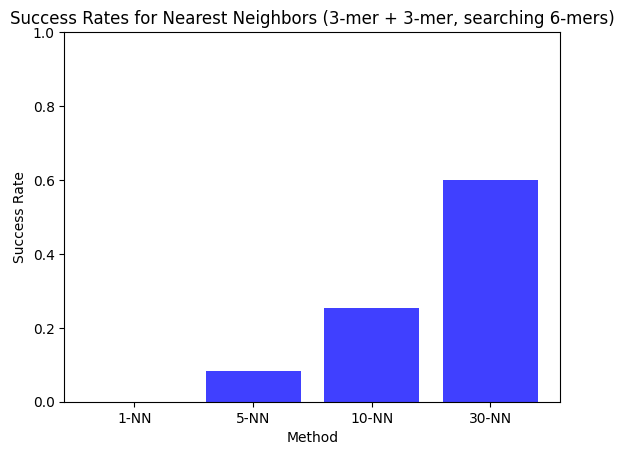

In [11]:
# 结果来源于官网下载的权重
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
import random

# Load the pretrained dna2vec model
filepath = 'dna2vec/pretrained/dna2vec-20161219-0153-k3to8-100d-10c-29320Mbp-sliding-Xat.w2v'
wv = KeyedVectors.load_word2vec_format(filepath, binary=False)

# Function to compute the vector for a given sequence using dna2vec model
def compute_vector(sequence):
    if 3 <= len(sequence) <= 8:
        return np.array(wv[sequence])
    else:
        raise ValueError("Sequence length must be between 3 and 8")

# Function to find the nearest neighbors of the sum of two vectors among 6mers
def find_nearest_neighbors(vector_sum, topn=10):
    return wv.similar_by_vector(vector_sum, topn=topn)

# Function to verify if the nearest neighbors of the sum of two k-mers contains their concatenation
def verify_neighbors(kmer1, kmer2, topn=10):
    vec1 = compute_vector(kmer1)
    vec2 = compute_vector(kmer2)
    vector_sum = vec1 + vec2
    neighbors = find_nearest_neighbors(vector_sum, topn=topn)

    concatenated1 = kmer1 + kmer2
    concatenated2 = kmer2 + kmer1
    neighbor_strings = set([neighbor[0] for neighbor in neighbors if len(neighbor[0]) == 6])

    success = bool(neighbor_strings.intersection({concatenated1, concatenated2}))

    return success

# Generate random 3-mer sequences
def generate_random_sequence(length=3):
    return ''.join(random.choices(['A', 'C', 'G', 'T'], k=length))

# Number of test cases
num_tests = 1000

# Conduct tests for different k-NN values
k_nn_values = [1, 5, 10, 30]
success_rates = {k: 0 for k in k_nn_values}

for _ in range(num_tests):
    kmer1 = generate_random_sequence(3)
    kmer2 = generate_random_sequence(3)
    for k in k_nn_values:
        if verify_neighbors(kmer1, kmer2, topn=k):
            success_rates[k] += 1

# Calculate success rates
success_rates = {k: v / num_tests for k, v in success_rates.items()}

# Print success rates
for k, rate in success_rates.items():
    print(f"Success rate for {k}-NN: {rate:.2%}")

# Visualize the success rates
categories = [f'{k}-NN' for k in k_nn_values]
success_rate_values = [success_rates[k] for k in k_nn_values]

plt.bar(categories, success_rate_values, color='blue', alpha=0.75)
plt.xlabel('Method')
plt.ylabel('Success Rate')
plt.title('Success Rates for Nearest Neighbors (3-mer + 3-mer, searching 6-mers)')
plt.ylim(0, 1)
plt.show()

File size is:  99896550
Success rate for 1-NN: 0.50%
Success rate for 5-NN: 28.90%
Success rate for 10-NN: 59.30%
Success rate for 30-NN: 89.80%


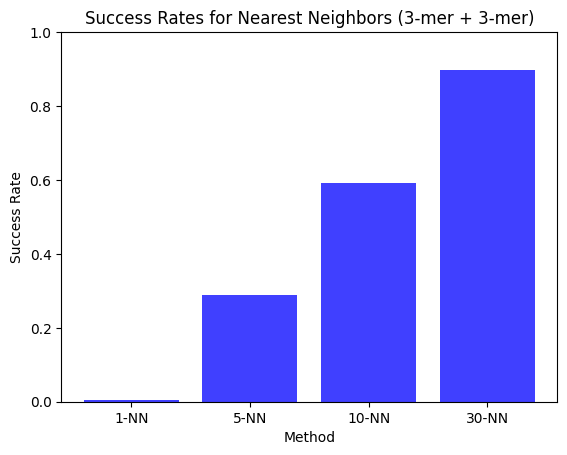

In [16]:
# 结果来源于我们使用hg38训练出来的权重
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
import random
import os

# 检查文件存在性
def check_file(filepath):
    if not os.path.exists(filepath):
        print("Error: File does not exist")
        return False
    if os.path.getsize(filepath) == 0:
        print("Error: File is empty")
        return False
    print("File size is: ", os.path.getsize(filepath))
    return True

def load_model(filepath):
    if not check_file(filepath):
        return None
    try:
        # 使用 KeyedVectors 加载 Word2Vec 格式的模型文件
        model = KeyedVectors.load_word2vec_format(filepath, binary=False)
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

def compute_vector(sequence, wv):
    if 3 <= len(sequence) <= 8:
        try:
            return np.array(wv[sequence])
        except KeyError:
            print(f"Sequence {sequence} not found in the model vocabulary.")
            return None
    else:
        raise ValueError("Sequence length must be between 3 and 8")

def find_nearest_neighbors(wv, vector_sum, topn=10):
    return wv.similar_by_vector(vector_sum, topn=topn)

# Function to verify if the nearest neighbors of the sum of two k-mers contains their concatenation
def verify_neighbors(kmer1, kmer2, wv, topn=10):
    vec1 = compute_vector(kmer1, wv)
    if vec1 is None:
        return False
    vec2 = compute_vector(kmer2, wv)
    if vec2 is None:
        return False
    vector_sum = vec1 + vec2
    neighbors = find_nearest_neighbors(wv, vector_sum, topn=topn)

    concatenated1 = kmer1 + kmer2
    concatenated2 = kmer2 + kmer1
    neighbor_strings = set([neighbor[0] for neighbor in neighbors])

    success = bool(neighbor_strings.intersection({concatenated1, concatenated2}))
    return success

# Generate random 3-mer sequences
def generate_random_sequence(length=3):
    return ''.join(random.choices(['A', 'C', 'G', 'T'], k=length))

def main():
    filepath = 'dna2vec/results/dna2vec-20240723-0922-k3to8-100d-10c-32730Mbp-sliding-fuh.w2v'
    wv = load_model(filepath)

    if wv is None:
        print("Model loading failed.")
        return

    # Number of test cases
    num_tests = 1000

    # Conduct tests for different k-NN values
    k_nn_values = [1, 5, 10, 30]
    success_rates = {k: 0 for k in k_nn_values}

    for _ in range(num_tests):
        kmer1 = generate_random_sequence(3)
        kmer2 = generate_random_sequence(3)
        for k in k_nn_values:
            if verify_neighbors(kmer1, kmer2, wv, topn=k):
                success_rates[k] += 1

    # Calculate success rates
    success_rates = {k: v / num_tests for k, v in success_rates.items()}

    # Print success rates
    for k, rate in success_rates.items():
        print(f"Success rate for {k}-NN: {rate:.2%}")

    # Visualize the success rates
    categories = [f'{k}-NN' for k in k_nn_values]
    success_rate_values = [success_rates[k] for k in k_nn_values]

    plt.bar(categories, success_rate_values, color='blue', alpha=0.75)
    plt.xlabel('Method')
    plt.ylabel('Success Rate')
    plt.title('Success Rates for Nearest Neighbors (3-mer + 3-mer)')
    plt.ylim(0, 1)
    plt.show()

if __name__ == "__main__":
    main()

File size is:  99797747
Success rate for 1-NN: 1.20%
Success rate for 5-NN: 36.00%
Success rate for 10-NN: 68.10%
Success rate for 30-NN: 96.90%


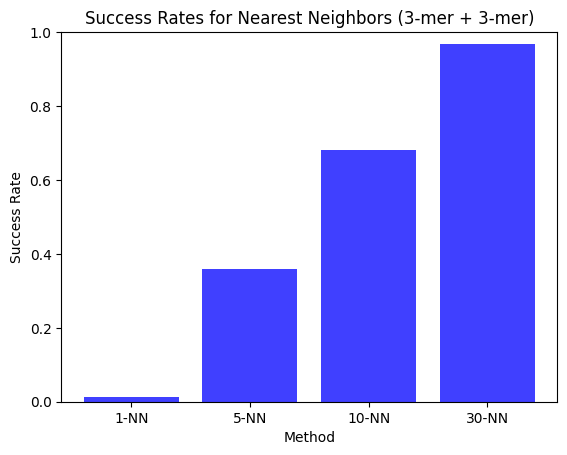

In [1]:
# 结果来源于我们使用小鼠基因组训练出来的权重 长度3-8
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors
import random
import os

# 检查文件存在性
def check_file(filepath):
    if not os.path.exists(filepath):
        print("Error: File does not exist")
        return False
    if os.path.getsize(filepath) == 0:
        print("Error: File is empty")
        return False
    print("File size is: ", os.path.getsize(filepath))
    return True

def load_model(filepath):
    if not check_file(filepath):
        return None
    try:
        # 使用 KeyedVectors 加载 Word2Vec 格式的模型文件
        model = KeyedVectors.load_word2vec_format(filepath, binary=False)
        return model
    except Exception as e:
        print(f"Error loading model: {e}")
        return None

def compute_vector(sequence, wv):
    if 3 <= len(sequence) <= 8:
        try:
            return np.array(wv[sequence])
        except KeyError:
            print(f"Sequence {sequence} not found in the model vocabulary.")
            return None
    else:
        raise ValueError("Sequence length must be between 3 and 8")

def find_nearest_neighbors(wv, vector_sum, topn=10):
    return wv.similar_by_vector(vector_sum, topn=topn)

# Function to verify if the nearest neighbors of the sum of two k-mers contains their concatenation
def verify_neighbors(kmer1, kmer2, wv, topn=10):
    vec1 = compute_vector(kmer1, wv)
    if vec1 is None:
        return False
    vec2 = compute_vector(kmer2, wv)
    if vec2 is None:
        return False
    vector_sum = vec1 + vec2
    neighbors = find_nearest_neighbors(wv, vector_sum, topn=topn)

    concatenated1 = kmer1 + kmer2
    concatenated2 = kmer2 + kmer1
    neighbor_strings = set([neighbor[0] for neighbor in neighbors])

    success = bool(neighbor_strings.intersection({concatenated1, concatenated2}))
    return success

# Generate random 3-mer sequences
def generate_random_sequence(length=3):
    return ''.join(random.choices(['A', 'C', 'G', 'T'], k=length))

def main():
    filepath = 'dna2vec/results/MouseFrom3To8/dna2vec-20240807-0825-k3to8-100d-10c-27850Mbp-sliding-Qtt.w2v'
    wv = load_model(filepath)

    if wv is None:
        print("Model loading failed.")
        return

    # Number of test cases
    num_tests = 1000

    # Conduct tests for different k-NN values
    k_nn_values = [1, 5, 10, 30]
    success_rates = {k: 0 for k in k_nn_values}

    for _ in range(num_tests):
        kmer1 = generate_random_sequence(3)
        kmer2 = generate_random_sequence(3)
        for k in k_nn_values:
            if verify_neighbors(kmer1, kmer2, wv, topn=k):
                success_rates[k] += 1

    # Calculate success rates
    success_rates = {k: v / num_tests for k, v in success_rates.items()}

    # Print success rates
    for k, rate in success_rates.items():
        print(f"Success rate for {k}-NN: {rate:.2%}")

    # Visualize the success rates
    categories = [f'{k}-NN' for k in k_nn_values]
    success_rate_values = [success_rates[k] for k in k_nn_values]

    plt.bar(categories, success_rate_values, color='blue', alpha=0.75)
    plt.xlabel('Method')
    plt.ylabel('Success Rate')
    plt.title('Success Rates for Nearest Neighbors (3-mer + 3-mer)')
    plt.ylim(0, 1)
    plt.show()

if __name__ == "__main__":
    main()

In [ ]:
# 综上所述 使用3-8长度的权重进行后续研究